<h1>Project 5</h1>

<h2>Heart Disease</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('Heart_Disease.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Lets give out dataset its column names so that data will make more sense

In [3]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [4]:
df.shape

(200, 14)

***Checking data types and null count of the columns***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


There are lot of missing values, since datatype is object and it is showing as ?.

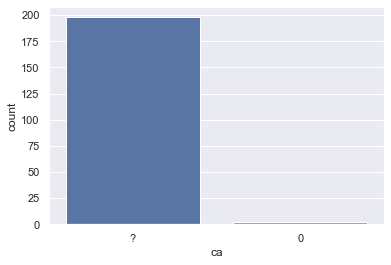

In [6]:
sns.countplot(df['ca'])

In column ca missing values are too high, its not a good idea to replace this since we don't have enough information, so lets drop this column

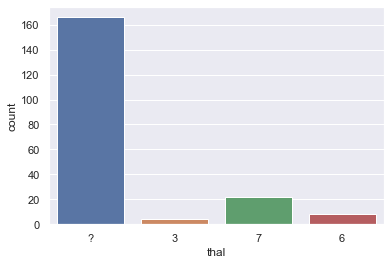

In [7]:
sns.countplot(df['thal'])

In column thal missing values are too high, its not a good idea to replace this since we don't have enough information, so lets drop this column

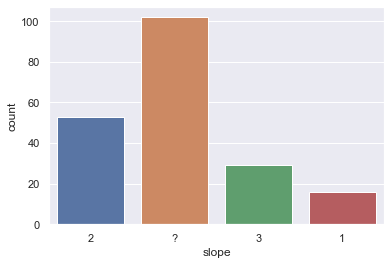

In [8]:
sns.countplot(df['slope'])

In column thal missing values are too high, its not a good idea to replace this since we don't have enough information, so lets drop this column

In [9]:
df=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','target']]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0


In [10]:
df.shape

(200, 11)

***Lets replace missing value with nan so that it will be easy for us to analyse***

In [11]:
df.replace({'?': np.nan}, regex=False,inplace=True)
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    56
chol         7
fbs          7
restecg      0
thalach     53
exang       53
oldpeak     56
target       0
dtype: int64

Lets first treat these Nan values

In [12]:
df.dropna(subset=["trestbps"], axis=0, inplace=True)
df.dropna(subset=["oldpeak"], axis=0, inplace=True)
df.dropna(subset=["chol"], axis=0, inplace=True)
df.dropna(subset=["fbs"], axis=0, inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Dropping the row for missing values was better missing data was huge and replacing it with mean, median or mode would have corrupted our data made it biased

In [13]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
target       int64
dtype: object

***Lets convert the value in target values since our aim is only to attempting to distinguish presence (values 1,2,3,4) from absence (value 0).***

In [14]:
df['target'] = df['target'].replace({2: 1})
df['target'] = df['target'].replace({3: 1})
df['target'] = df['target'].replace({4: 1})
df['target'].unique()

array([1, 0], dtype=int64)

Now, our output will be clear, where 0 will indicate absence and 1 will indicate presence

***Lets bring the whole data into same datatype***

In [15]:
df=df.astype('float')
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
target      float64
dtype: object

***As we have drops rows, lets reset index***

In [16]:
df.reset_index(drop=True, inplace=True)

***Checking for outliers***

*First we will check for outliers visually for each attributes, for this box plot is the best option*

AxesSubplot(0.125,0.125;0.775x0.755)


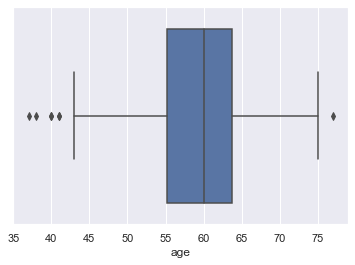

AxesSubplot(0.125,0.125;0.775x0.755)


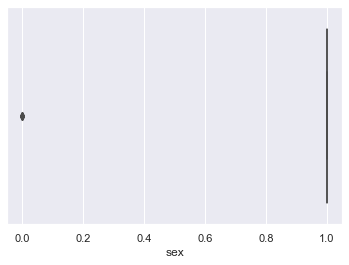

AxesSubplot(0.125,0.125;0.775x0.755)


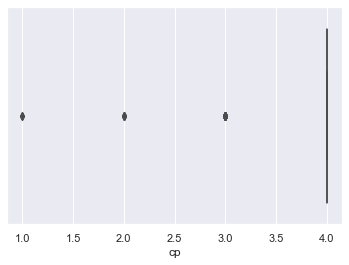

AxesSubplot(0.125,0.125;0.775x0.755)


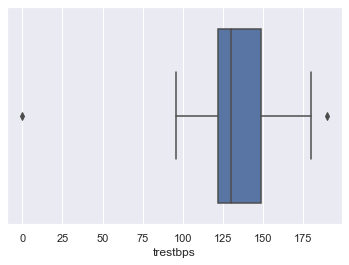

AxesSubplot(0.125,0.125;0.775x0.755)


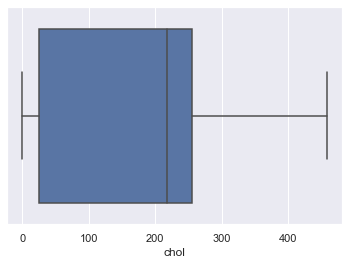

AxesSubplot(0.125,0.125;0.775x0.755)


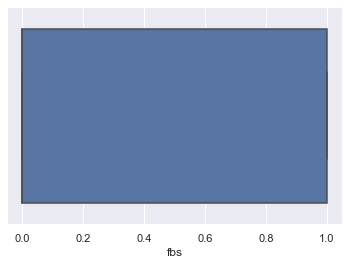

AxesSubplot(0.125,0.125;0.775x0.755)


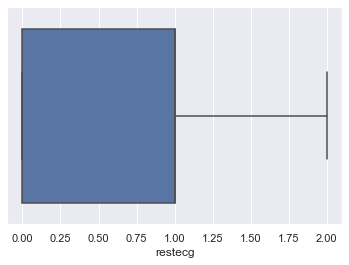

AxesSubplot(0.125,0.125;0.775x0.755)


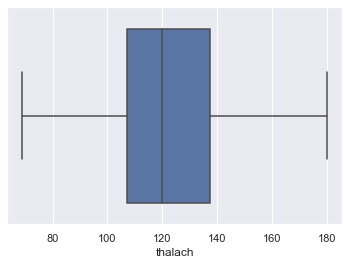

AxesSubplot(0.125,0.125;0.775x0.755)


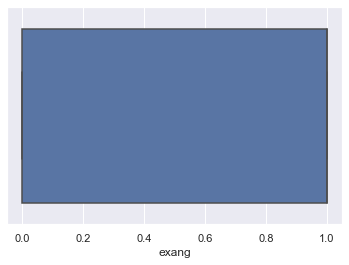

AxesSubplot(0.125,0.125;0.775x0.755)


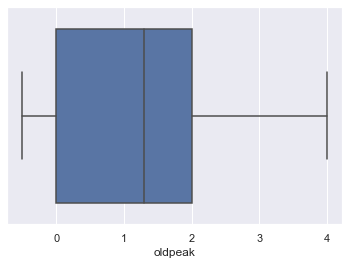

AxesSubplot(0.125,0.125;0.775x0.755)


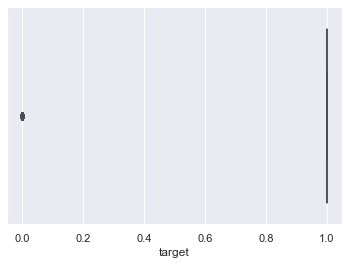

In [17]:
col=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','target']
for i in range(0,11):
    print(sns.boxplot(df[col[i]]))
    plt.show()

We can see visually that there are multiple dots outside the plot which are indicating outliers, here its huge

*Now, we will remove these outliers using below code*

In [18]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print('The shape of the dataset before removing outliers is',df.shape)
df_z = df[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
df=df_z

The shape of the dataset before removing outliers is (130, 11)
The shape of the dataset after removing outliers is (121, 11)


***Lets calculate correlation***

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,NaN,0.052670,0.240905,0.097546,0.174664,0.020194,-0.129308,0.201939,0.145939,0.176978
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,0.052670,NaN,1.000000,0.023227,0.082199,-0.118707,-0.065653,-0.088717,0.173885,0.186589,0.168723
trestbps,0.240905,NaN,0.023227,1.000000,0.127654,0.236290,0.102919,0.074128,0.235868,0.189635,0.163865
chol,0.097546,NaN,0.082199,0.127654,1.000000,0.124988,0.007478,-0.086626,0.120532,0.080695,0.097924
fbs,0.174664,NaN,-0.118707,0.236290,0.124988,1.000000,0.112227,0.076768,-0.181050,-0.094973,0.106034
restecg,0.020194,NaN,-0.065653,0.102919,0.007478,0.112227,1.000000,0.056559,-0.016253,-0.180215,-0.067766
thalach,-0.129308,NaN,-0.088717,0.074128,-0.086626,0.076768,0.056559,1.000000,-0.045468,0.214372,-0.015061
exang,0.201939,NaN,0.173885,0.235868,0.120532,-0.181050,-0.016253,-0.045468,1.000000,0.401254,0.309939
oldpeak,0.145939,NaN,0.186589,0.189635,0.080695,-0.094973,-0.180215,0.214372,0.401254,1.000000,0.226896


***Lets visualize using heat map as well***

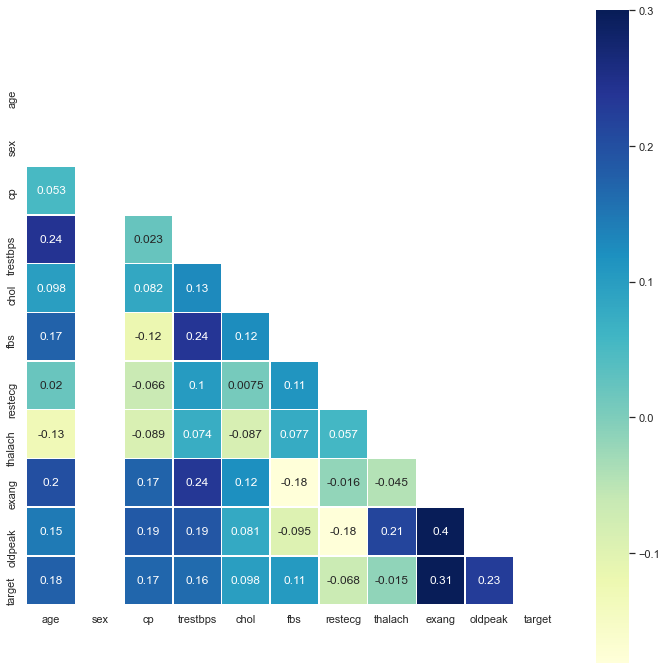

In [20]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

***Lets find out the columns that are not correlated with our output variables and which are not useful to us in any way***

In [21]:
df1=df.corr()
#since we only care about the correlation with our output, lets separate it
df2=df1.iloc[:,10:11]
df2

,target
age,0.176978
sex,NaN
cp,0.168723
trestbps,0.163865
chol,0.097924
fbs,0.106034
restecg,-0.067766
thalach,-0.015061
exang,0.309939
oldpeak,0.226896


If the value is 0 there is no correlation, if value is 1 they are highly correlated.

***Lets set our threshold value as 0.1 and drop columns with value less than this considering they are not correlated***

In [22]:
np.abs(df2)<0.1

,target
age,False
sex,False
cp,False
trestbps,False
chol,True
fbs,False
restecg,True
thalach,True
exang,False
oldpeak,False


From the above data we can see that chol,restecg,thalach are not correlated with target, hence we can drop them

*We are using regplot here to visualize the same. There is a line that passes through the points in the plot which will give us an idea if that column is positively correlated or negatively correlated or not correlated at all.
If the line comes close to horizontal, we can assume that its not correlated and drop such columns as those columns are not helping us in any way to make our prediction.*

AxesSubplot(0.125,0.125;0.775x0.755)


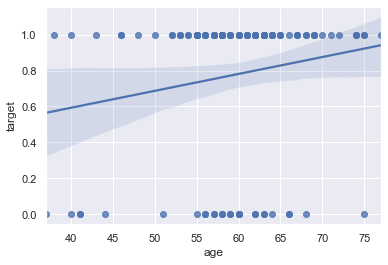

AxesSubplot(0.125,0.125;0.775x0.755)


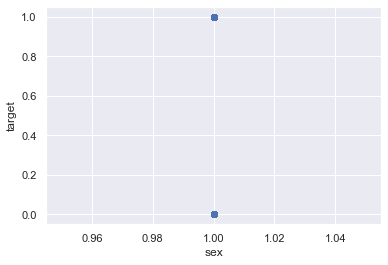

AxesSubplot(0.125,0.125;0.775x0.755)


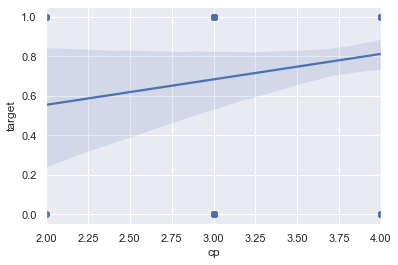

AxesSubplot(0.125,0.125;0.775x0.755)


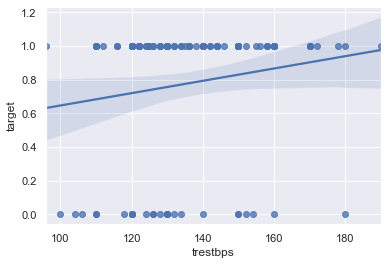

AxesSubplot(0.125,0.125;0.775x0.755)


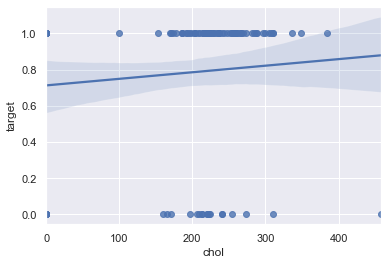

AxesSubplot(0.125,0.125;0.775x0.755)


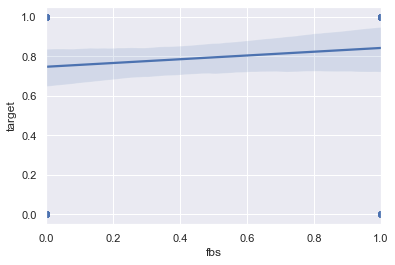

AxesSubplot(0.125,0.125;0.775x0.755)


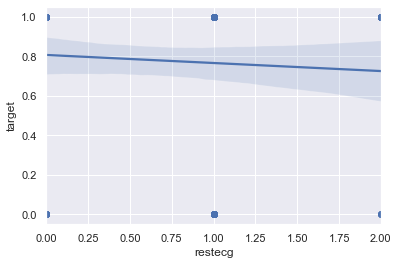

AxesSubplot(0.125,0.125;0.775x0.755)


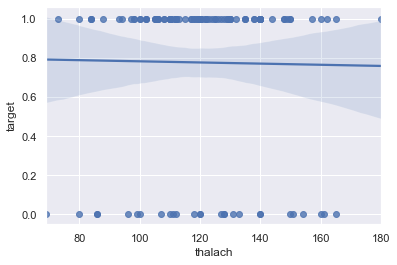

In [23]:
col=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','target']

for i in range(0,8):
    print(sns.regplot(x=col[i],y="target",data=df))
    plt.show()

***Separating our input and output features***

In [24]:
x=df[['age','sex','cp','trestbps','fbs','exang','oldpeak']]
x.head()

,age,sex,cp,trestbps,fbs,exang,oldpeak
0,63.0,1.0,4.0,140.0,0.0,1.0,3.0
1,44.0,1.0,4.0,130.0,0.0,0.0,0.0
2,60.0,1.0,4.0,132.0,0.0,1.0,1.5
3,55.0,1.0,4.0,142.0,0.0,1.0,2.5
4,66.0,1.0,3.0,110.0,1.0,1.0,1.3


In [25]:
y=df[['target']]
y.head()

,target
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


***Lets check for skewness in our input features***

In [26]:
x.skew()

age        -0.533837
sex         0.000000
cp         -1.912682
trestbps    0.563417
fbs         0.811368
exang      -0.769955
oldpeak     0.448140
dtype: float64

***Lets scale our data using standard scalar***

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
df_x=ss.transform(x)
df_x

array([[ 0.43926482,  0.        ,  0.5       ,  0.24322063, -0.67663234,
         0.68964466,  1.53816781],
       [-1.98248537,  0.        ,  0.5       , -0.29381763, -0.67663234,
        -1.4500221 , -1.12319976],
       [ 0.05688321,  0.        ,  0.5       , -0.18640998, -0.67663234,
         0.68964466,  0.20748403],
       [-0.58041947,  0.        ,  0.5       ,  0.35062829, -0.67663234,
         0.68964466,  1.09460655],
       [ 0.82164643,  0.        , -1.33333333, -1.36789415,  1.47790748,
         0.68964466,  0.03005952],
       [ 0.82164643,  0.        , -1.33333333, -0.83085589, -0.67663234,
        -1.4500221 , -1.56676102],
       [ 0.6941859 ,  0.        ,  0.5       ,  0.7802589 ,  1.47790748,
         0.68964466, -1.12319976],
       [ 0.05688321,  0.        , -1.33333333,  2.39137368, -0.67663234,
         0.68964466,  0.20748403],
       [ 0.05688321,  0.        , -3.16666667,  1.31729716,  1.47790748,
        -1.4500221 , -0.67963849],
       [-0.45295893,  0.    

In [28]:
x=pd.DataFrame(df_x,columns=x.columns)
x.head()

,age,sex,cp,trestbps,fbs,exang,oldpeak
0,0.439265,0.0,0.500000,0.243221,-0.676632,0.689645,1.538168
1,-1.982485,0.0,0.500000,-0.293818,-0.676632,-1.450022,-1.123200
2,0.056883,0.0,0.500000,-0.186410,-0.676632,0.689645,0.207484
3,-0.580419,0.0,0.500000,0.350628,-0.676632,0.689645,1.094607
4,0.821646,0.0,-1.333333,-1.367894,1.477907,0.689645,0.030060


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***Lets split our data randomly and see which model works better***

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets import all the classification models***

In [31]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [32]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.64


Cross_Val_Score =  0.7519230769230769


roc_auc_score =  0.475


classification_report
               precision    recall  f1-score   support

         0.0       0.17      0.20      0.18         5
         1.0       0.79      0.75      0.77        20

    accuracy                           0.64        25
   macro avg       0.48      0.47      0.48        25
weighted avg       0.66      0.64      0.65        25



[[ 1  4]
 [ 5 15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


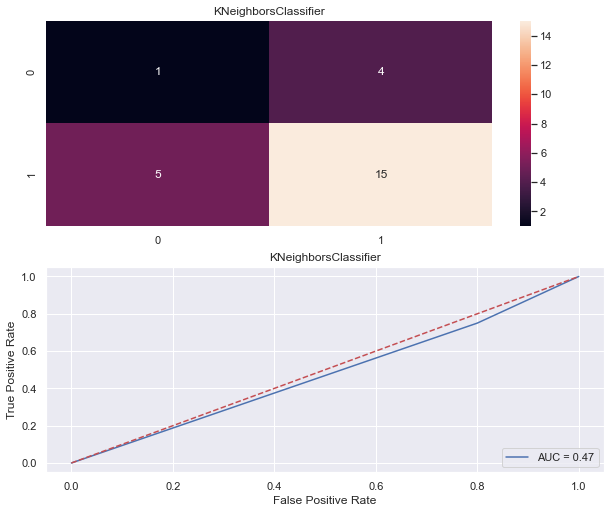




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.64


Cross_Val_Score =  0.7429487179487181


roc_auc_score =  0.475


classification_report
               precision    recall  f1-score   support

         0.0       0.17      0.20      0.18         5
         1.0       0.79      0.75      0.77        20

    accuracy                           0.64        25
   macro avg       0.48      0.47      0.48        25
weighted avg       0.66      0.64      0.65        25



[[ 1  4]
 [ 5 15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


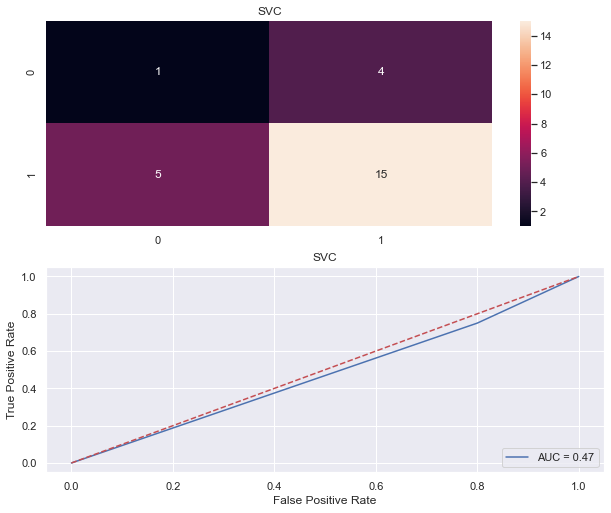




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.64


Cross_Val_Score =  0.7839743589743591


roc_auc_score =  0.475


classification_report
               precision    recall  f1-score   support

         0.0       0.17      0.20      0.18         5
         1.0       0.79      0.75      0.77        20

    accuracy                           0.64        25
   macro avg       0.48      0.47      0.48        25
weighted avg       0.66      0.64      0.65        25



[[ 1  4]
 [ 5 15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


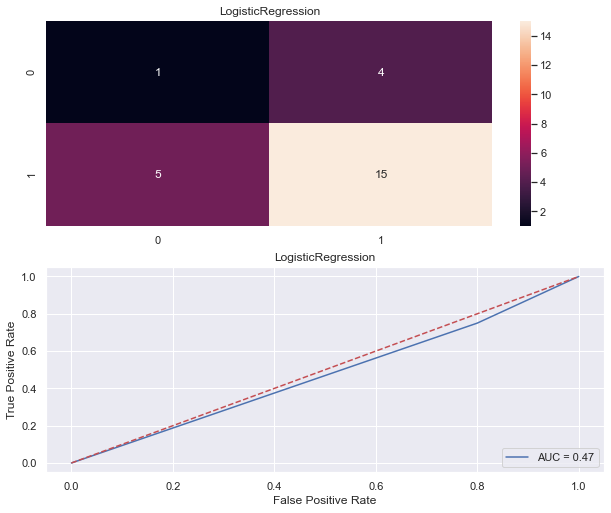




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.68


Cross_Val_Score =  0.6692307692307693


roc_auc_score =  0.575


classification_report
               precision    recall  f1-score   support

         0.0       0.29      0.40      0.33         5
         1.0       0.83      0.75      0.79        20

    accuracy                           0.68        25
   macro avg       0.56      0.57      0.56        25
weighted avg       0.72      0.68      0.70        25



[[ 2  3]
 [ 5 15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


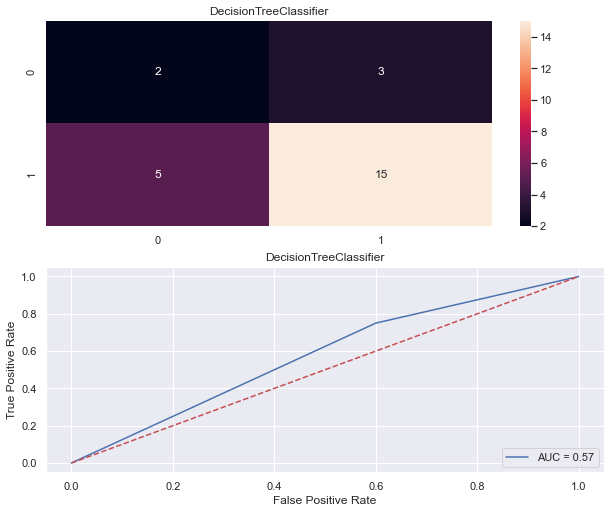




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.6


Cross_Val_Score =  0.7512820512820514


roc_auc_score =  0.44999999999999996


classification_report
               precision    recall  f1-score   support

         0.0       0.14      0.20      0.17         5
         1.0       0.78      0.70      0.74        20

    accuracy                           0.60        25
   macro avg       0.46      0.45      0.45        25
weighted avg       0.65      0.60      0.62        25



[[ 1  4]
 [ 6 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


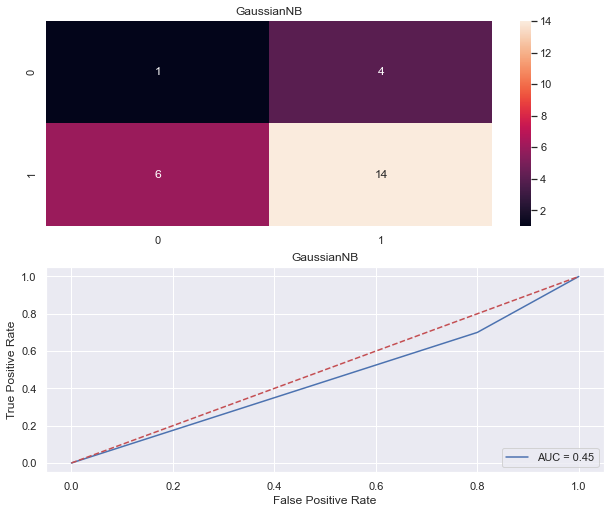

In [33]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [34]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,64.0,75.192308,47.5
1,SVC,64.0,74.294872,47.5
2,LogisticRegression,64.0,78.397436,47.5
3,DecisionTreeClassifier,68.0,66.923077,57.5
4,GaussianNB,60.0,75.128205,45.0


DecisonTree seems to have higher accuracy, lets try to make this better

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 64.0


We will take DecisionTreeClassifier	 as final model since accuracy is more

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [37]:
import joblib
joblib.dump(DT,'Heart_Disease.pkl')

['Heart_Disease.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
